In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM


Using TensorFlow backend.


   index      date   time     open     high      low    close
0  NIFTY  20130401  09:16  5701.15  5704.65  5694.30  5697.00
1  NIFTY  20130401  09:17  5697.05  5698.35  5695.65  5697.50
2  NIFTY  20130401  09:18  5697.90  5697.90  5690.60  5692.15
3  NIFTY  20130401  09:19  5691.65  5694.70  5691.65  5693.90
4  NIFTY  20130401  09:20  5694.40  5695.05  5693.35  5694.55


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


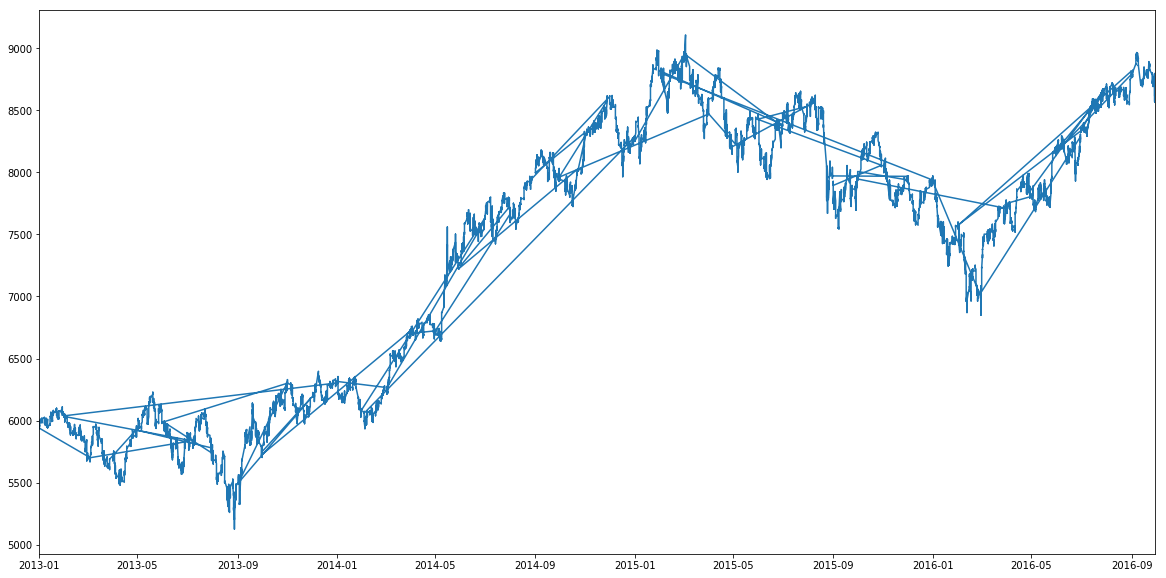

In [2]:

df = pd.read_csv("../input/nse-stocks-database/nifty50.csv")

print(df.head())

df['date'] = pd.to_datetime(df.date,format='%Y%m%d')
df.index = df['date']

plt.autoscale(enable=True, axis='x', tight=True)
plt.plot(df['close'], label='Close Price history')


In [3]:
df.head()


,index,date,time,open,high,low,close
date,,,,,,,
2013-04-01,NIFTY,2013-04-01,09:16,5701.15,5704.65,5694.30,5697.00
2013-04-01,NIFTY,2013-04-01,09:17,5697.05,5698.35,5695.65,5697.50
2013-04-01,NIFTY,2013-04-01,09:18,5697.90,5697.90,5690.60,5692.15
2013-04-01,NIFTY,2013-04-01,09:19,5691.65,5694.70,5691.65,5693.90
2013-04-01,NIFTY,2013-04-01,09:20,5694.40,5695.05,5693.35,5694.55


In [4]:

data = df.sort_index(ascending=True, axis=0)

In [5]:
data.shape

(352920, 7)

In [6]:
"""
new_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])
for i in range(0,len(data)):
    new_data['date'][i] = data['date'][i]
    new_data['close'][i] = data['close'][i]
"""

"\nnew_data = pd.DataFrame(index=range(0,len(df)),columns=['date', 'close'])\nfor i in range(0,len(data)):\n    new_data['date'][i] = data['date'][i]\n    new_data['close'][i] = data['close'][i]\n"

In [7]:
data.drop('time', axis=1, inplace=True)
data.drop('index', axis=1, inplace=True)
data.drop('open', axis=1, inplace=True)
data.drop('high', axis=1, inplace=True)
data.drop('low', axis=1, inplace=True)


In [8]:
data.head()


,date,close
date,,
2013-01-01,2013-01-01,5954.95
2013-01-01,2013-01-01,5951.10
2013-01-01,2013-01-01,5951.20
2013-01-01,2013-01-01,5951.80
2013-01-01,2013-01-01,5949.60


In [9]:

data.index = data.date
print(data.head())
data.drop('date', axis=1, inplace=True)
print(data.head())

dataset = data.values

train = dataset[0:247044,:]
valid = dataset[247044:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_valid=scaler.fit_transform(valid)


                 date    close
date                          
2013-01-01 2013-01-01  5954.95
2013-01-01 2013-01-01  5951.10
2013-01-01 2013-01-01  5951.20
2013-01-01 2013-01-01  5951.80
2013-01-01 2013-01-01  5949.60
              close
date               
2013-01-01  5954.95
2013-01-01  5951.10
2013-01-01  5951.20
2013-01-01  5951.80
2013-01-01  5949.60


In [10]:
"""
#setting index
new_data.index = new_data.date
new_data.drop('date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:24704,:]
valid = dataset[24704:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
"""

"\n#setting index\nnew_data.index = new_data.date\nnew_data.drop('date', axis=1, inplace=True)\n\n#creating train and test sets\ndataset = new_data.values\n\ntrain = dataset[0:24704,:]\nvalid = dataset[24704:,:]\n\n#converting dataset into x_train and y_train\nscaler = MinMaxScaler(feature_range=(0, 1))\nscaled_data = scaler.fit_transform(dataset)\n"

In [11]:
dataset = data.values

train = dataset[0:247044,:]
valid = dataset[247044:,:]

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)


In [12]:
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))


In [13]:
x_train.shape

(246984, 60, 1)

In [14]:

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=32))
model.add(Dense(16))
model.add(Dense(1))



In [15]:
print(model.layers)

[<keras.layers.recurrent.LSTM object at 0x7f32f92c6898>, <keras.layers.recurrent.LSTM object at 0x7f33402bdb38>, <keras.layers.core.Dense object at 0x7f32f92cf208>, <keras.layers.core.Dense object at 0x7f32f924bac8>]


In [16]:
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.fit(x_train, y_train, epochs=20, batch_size=60, verbose=1,validation_split=0.05)



Train on 234634 samples, validate on 12350 samples
Epoch 1/20
234634/234634 [==============================] - 354s 2ms/step - loss: 6.0975e-04 - val_loss: 2.3773e-04
Epoch 2/20
234634/234634 [==============================] - 360s 2ms/step - loss: 1.4444e-04 - val_loss: 1.4448e-04
Epoch 3/20
234634/234634 [==============================] - 358s 2ms/step - loss: 1.0232e-04 - val_loss: 8.8807e-06
Epoch 4/20
234634/234634 [==============================] - 356s 2ms/step - loss: 5.5871e-05 - val_loss: 1.4119e-04
Epoch 8/20
234634/234634 [==============================] - 359s 2ms/step - loss: 4.7190e-05 - val_loss: 1.2508e-05
Epoch 10/20
234634/234634 [==============================] - 356s 2ms/step - loss: 3.2215e-05 - val_loss: 4.1973e-05
Epoch 17/20
  2040/234634 [..............................] - ETA: 6:00 - loss: 3.1206e-05

In [17]:
inputs = data[len(data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
scaled_closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(scaled_closing_price)



In [18]:
"""
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
"""


'\n#predicting 246 values, using past 60 from the train data\ninputs = new_data[len(new_data) - len(valid) - 60:].values\ninputs = inputs.reshape(-1,1)\ninputs  = scaler.transform(inputs)\n\nX_test = []\nfor i in range(60,inputs.shape[0]):\n    X_test.append(inputs[i-60:i,0])\nX_test = np.array(X_test)\n\nX_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))\nclosing_price = model.predict(X_test)\nclosing_price = scaler.inverse_transform(closing_price)\n'

In [19]:
rms=np.sqrt(np.mean(np.power((scaled_valid-scaled_closing_price),2)))
print("Root Means Squared Error:",rms)
print("Accuracy:",(1-rms)*100)


Root Means Squared Error: 0.205430700919677
Accuracy: 79.45692990803231


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


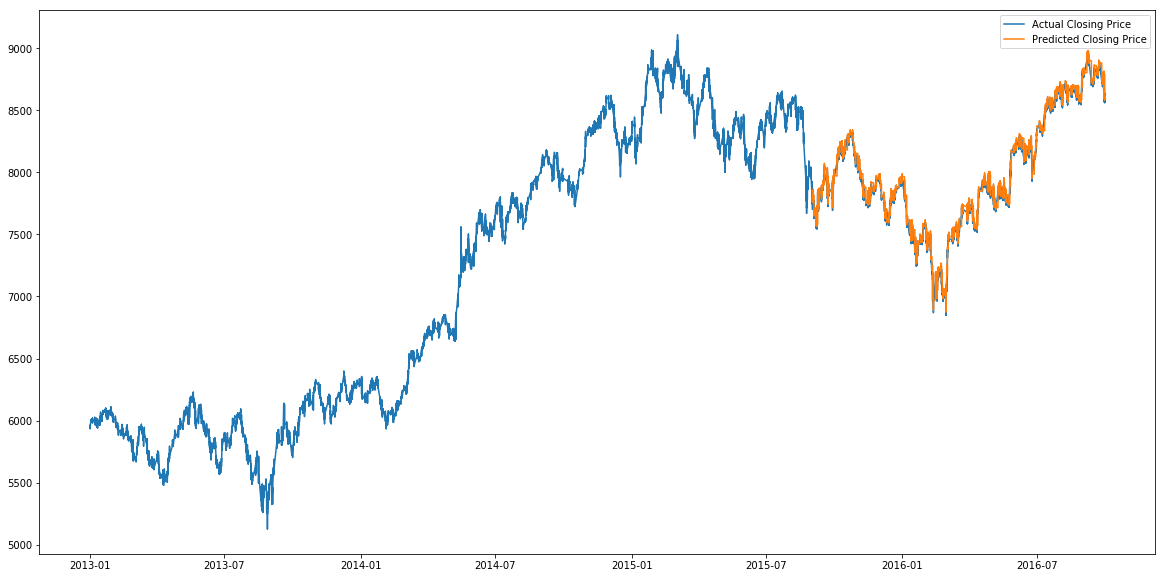

In [20]:
#train = data[:247044]
#valid = data[247044:]
actual_close=data[:]
#closing_price = scaler.inverse_transform(scaled_closing_price)
predicted_close=data[247044:]
predicted_close['predicted']=closing_price
"""
valid['Predictions'] = closing_price
plt.plot(train['close'],label='Actual Price')
#plt.plot(valid[['close','Predictions']],label=["Predicted Price","Actual Price"])
plt.plot(valid[['close']],label='Actual Price')
plt.plot(valid[['Predictions']],label="Predicted Price")
plt.legend()
plt.show()
"""
plt.plot(actual_close['close'],label='Actual Closing Price')
plt.plot(predicted_close['predicted'],label='Predicted Closing Price')
plt.legend()
plt.show()


In [21]:
model.save("model.h5")

In [22]:
model.save_weights("weights.h5")


In [23]:
X_test[0][-1]
y=[]
for i in range(105876):
    y.append(X_test[i][-1])
y=np.array(y)

In [24]:
predictions=model.predict(X_test[20000:60000])

In [25]:
rms=np.sqrt(np.mean(np.power((y[20000:60000]-predictions),2)))
print(rms)


0.004657709942767564


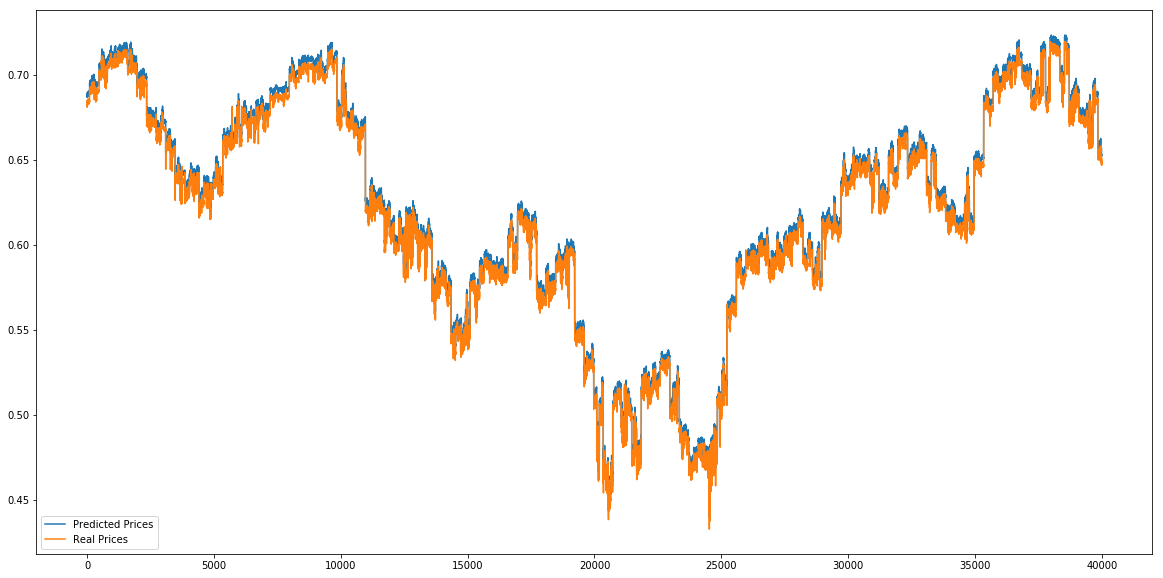

In [26]:
plt.plot(predictions,label='Predicted Prices')
plt.plot(y[20000:60000],label='Real Prices')
plt.legend()
plt.show()



In [27]:
m=load_model('model.h5')
#m=model()


In [28]:
X=[[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
  [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
  [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
  [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
  [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
  [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
  [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],
   [np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)],[np.random.sample(60)]]


In [29]:
X=np.array(X)

In [30]:
X.shape
t=X.shape[0]
print(t)

180


In [31]:
X=np.reshape(X,(t,60,1))

In [32]:
Y=[]
for i in range(t):
    Y.append(X[i][-1])
Y=np.array(Y)


In [33]:
p_vals=m.predict(X)


In [34]:
rms=np.sqrt(np.mean(np.power((Y-p_vals),2)))
print("Root Means Squared Error:",rms)
print("Accuracy: ",(1-rms)*100)


Root Means Squared Error: 0.15527879360957078
Accuracy:  84.47212063904293


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

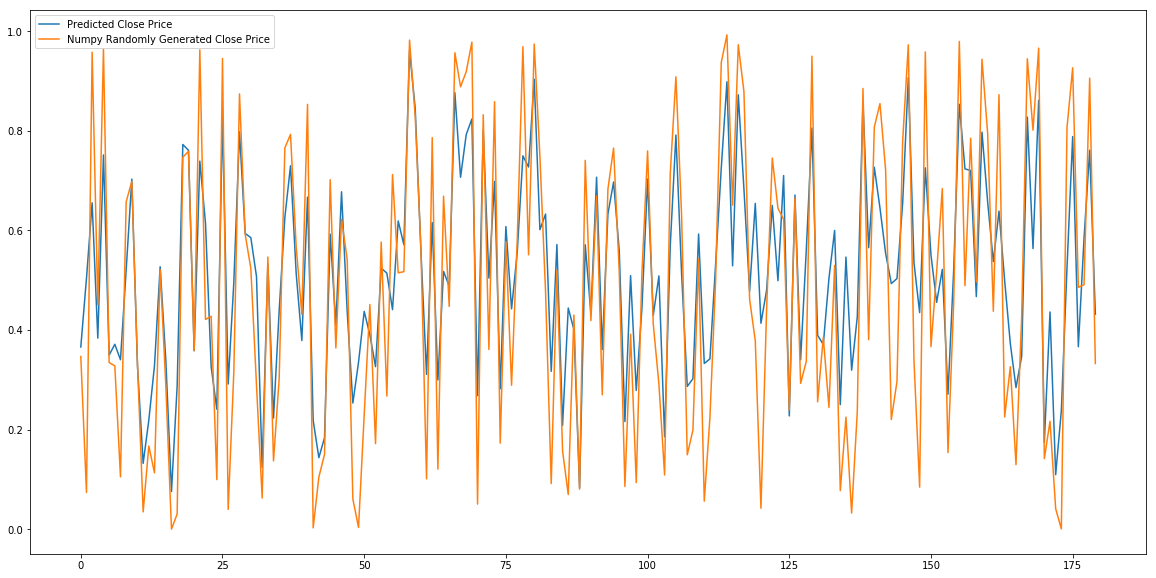

In [35]:
plt.plot(p_vals,label='Predicted Close Price')
plt.plot(Y,label='Numpy Randomly Generated Close Price')
plt.legend()
plt.plot